In [2]:
from neural_implementation import neural_classification as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# UCITAVANJE PODATAKA I TESTIRANJE

df = pd.read_csv('../datasets/iris_extended.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
N = df.shape[0]
print(f'Ukupan broj podataka: {N}')

m = df.shape[1] - 1
print(f'Broj atributa svakog podatka: {m}')

attributes = list(df.drop('variety', axis=True).columns)
print(f'Atributi: {attributes}')

Ukupan broj podataka: 250
Broj atributa svakog podatka: 4
Atributi: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']


In [5]:
attr1 = 'petal.length'
attr2 = 'petal.width'
attributes = [attr1, attr2]
m = len(attributes)

N = df.shape[0]
print(f'Velicina skupa podataka: {N}')

Velicina skupa podataka: 250


In [6]:
classes = df['variety'].unique()
n_classes = len(classes)

print(f'Klase: {classes}')
print(f'Broj klasa: {n_classes}\n')

name_to_class_dict = dict(zip(classes, range(n_classes)))
class_to_name_dict = dict(zip(range(n_classes), classes))

print(f'Mapiranje imena klasa u numericke vrednosti:')
for name, cls in name_to_class_dict.items():
    print(f'{name} -> {cls}')

print()
print(f'Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:')
for cls, name in class_to_name_dict.items():
    print(f'{cls} -> {name}')

Klase: ['Setosa' 'Versicolor' 'Virginica' 'Letosa' 'Helenica']
Broj klasa: 5

Mapiranje imena klasa u numericke vrednosti:
Setosa -> 0
Versicolor -> 1
Virginica -> 2
Letosa -> 3
Helenica -> 4

Mapiranje numerickih vrednosti u odgovarajuce nazive klasa:
0 -> Setosa
1 -> Versicolor
2 -> Virginica
3 -> Letosa
4 -> Helenica


In [7]:
mapper_cls_to_vec = {}
for i in range(n_classes):
    vec = np.zeros((n_classes,))
    vec[i] = 1
    
    mapper_cls_to_vec[i] = vec
    
print('Mapiranje numericke vrednosti u odgovarajuci vektor:')
for cls, vec in mapper_cls_to_vec.items():
    print(f'{cls} -> {vec}')

Mapiranje numericke vrednosti u odgovarajuci vektor:
0 -> [1. 0. 0. 0. 0.]
1 -> [0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0.]
3 -> [0. 0. 0. 1. 0.]
4 -> [0. 0. 0. 0. 1.]


In [8]:
y_tmp = df['variety']

y = np.zeros((N, n_classes))
for i in range(N):
    cls = name_to_class_dict[y_tmp[i]]
    y[i] = mapper_cls_to_vec[cls]

In [9]:
X = np.ones((N, 2*m + 1))
X[:, 1] = df[attr1]
X[:, 2] = df[attr2]
X[:, 3] = df[attr1]**2
X[:, 4] = df[attr2]**2

In [10]:
print(f'Podaci:')
print(X[:10])
print(' ...')

print(f'Ciljne promenljive:')
print(y[:10])
print(' ...')

Podaci:
[[1.   1.4  0.2  1.96 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.3  0.2  1.69 0.04]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.7  0.4  2.89 0.16]
 [1.   1.4  0.3  1.96 0.09]
 [1.   1.5  0.2  2.25 0.04]
 [1.   1.4  0.2  1.96 0.04]
 [1.   1.5  0.1  2.25 0.01]]
 ...
Ciljne promenljive:
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
 ...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    test_size=0.35, 
                                                    random_state=5)

In [12]:
print(f'X_train:')
print(X_train[:10])
print(' ...')
print()

print(f'y_train:')
print(y_train[:10])
print(' ...')
print()

print(f'X_test:')
print(X_test[:10])
print(' ...')
print()

print(f'y_test:')
print(y_test[:10])
print(' ...')

X_train:
[[ 1.    2.4   2.1   5.76  4.41]
 [ 1.    3.5   1.3  12.25  1.69]
 [ 1.    1.3   0.2   1.69  0.04]
 [ 1.    1.3   0.2   1.69  0.04]
 [ 1.    5.9   0.6  34.81  0.36]
 [ 1.    4.9   2.   24.01  4.  ]
 [ 1.    2.8   1.4   7.84  1.96]
 [ 1.    4.5   1.5  20.25  2.25]
 [ 1.    2.3   1.4   5.29  1.96]
 [ 1.    1.4   0.3   1.96  0.09]]
 ...

y_train:
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]
 ...

X_test:
[[ 1.    1.5   0.3   2.25  0.09]
 [ 1.    6.3   1.2  39.69  1.44]
 [ 1.    1.5   0.4   2.25  0.16]
 [ 1.    1.6   0.2   2.56  0.04]
 [ 1.    2.7   1.3   7.29  1.69]
 [ 1.    1.7   0.3   2.89  0.09]
 [ 1.    5.7   0.7  32.49  0.49]
 [ 1.    5.7   2.5  32.49  6.25]
 [ 1.    6.1   2.3  37.21  5.29]
 [ 1.    4.9   1.8  24.01  3.24]]
 ...

y_test:
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0

In [13]:
nn = nc.NeuralNetwork(2*m, [3*m], n_classes)

nn.print_network()
print()

nn.print_layer_mapper_sizes()
print()

print('Initial model:')
nn.print_model()

~ Neural network ~
Layer 1:
[1. 1. 1. 1. 1.]
Layer 2:
[1. 1. 1. 1. 1. 1. 1.]
Layer 3:
[1. 1. 1. 1. 1.]

Dimenzije matrica modela koji mapiraju slojeve:
0 -> 1: 6 x 5
1 -> 2: 5 x 7

Initial model:
Model:
W_0: 0 -> 1, shape: (6, 5)
[[-0.06157264  0.09615163 -0.0276511   0.07133403 -0.07579739]
 [ 0.07011184  0.01999647 -0.04791899 -0.02427859  0.04364305]
 [ 0.01924523 -0.07584433  0.0943057   0.08261045  0.06512398]
 [ 0.06389872 -0.052628   -0.09072422  0.09901065  0.09255535]
 [ 0.01206866 -0.00522093 -0.0311791  -0.08715674  0.09527713]
 [ 0.05582692  0.08281624  0.06815128 -0.0806189   0.07919447]]
W_1: 1 -> 2, shape: (5, 7)
[[ 0.08152145 -0.03419015  0.05619043  0.06019812 -0.01858365  0.05824296
  -0.02376717]
 [-0.01690141  0.0148221   0.00170834 -0.05964638 -0.05808759 -0.04672434
  -0.08627023]
 [-0.06537666 -0.00968331  0.07700766 -0.04718174  0.00843327  0.06404
   0.07436258]
 [-0.00718591 -0.06170562 -0.05894271 -0.08831093 -0.03572811  0.06523224
   0.01647312]
 [-0.015027

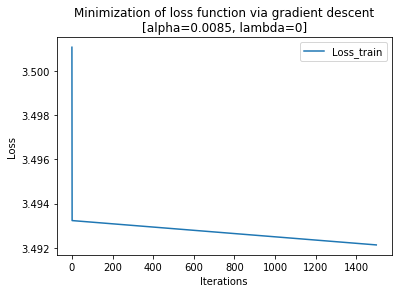

Trained model:
Model:
W_0: 0 -> 1
[[ 0.03975651 -0.0745578   0.08053794  0.0588446  -0.0267236 ]
 [-0.09377972  0.06280023  0.03035399 -0.00429894  0.0988881 ]
 [ 0.0712357   0.08673601  0.00627136 -0.07338153  0.01823906]
 [-0.06012143  0.00189702  0.07816687 -0.03552897  0.05970653]]
W_1: 1 -> 2
[[ 0.06189098 -0.02146348  0.07453357  0.0773799  -0.05543459]
 [-0.08737863 -0.00846622 -0.0060384   0.09446711  0.08525127]
 [ 0.08774894 -0.09422432  0.03946135 -0.0702783  -0.04558369]
 [-0.03697014 -0.06895149  0.0435051  -0.02661004 -0.04524813]]
W_2: 2 -> 3
[[ 0.06189098 -0.02146348  0.07453357  0.0773799  -0.05543459]
 [-0.08737863 -0.00846622 -0.0060384   0.09446711  0.08525127]
 [ 0.08774894 -0.09422432  0.03946135 -0.0702783  -0.04558369]
 [-0.03697014 -0.06895149  0.0435051  -0.02661004 -0.04524813]]
W_3: 3 -> 4
[[ 0.06189098 -0.02146348  0.07453357  0.0773799  -0.05543459]
 [-0.08737863 -0.00846622 -0.0060384   0.09446711  0.08525127]
 [ 0.08774894 -0.09422432  0.03946135 -0.0702

In [14]:
clf = nn.fit(X_train, 
             y_train, 
             alpha=0.0085, 
             num_iter=1500,
             plot=True, 
             gc_it=300, 
             gc_log_path='./gc_test3.txt')

print('Trained model:')
clf.print_model()
print()

nn.print_network()

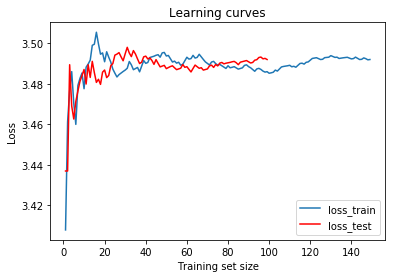

In [15]:
nc.plot_learning_curves(X_train, y_train, X_test, y_test, clf)

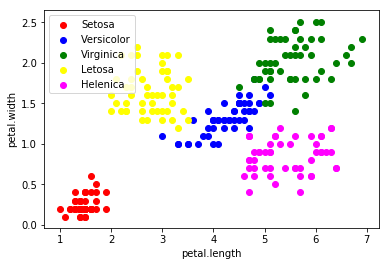

In [16]:
colors = ['red', 'blue', 'green', 'yellow', 'magenta']
for c, cls in zip(colors, classes):
    subsample = df.loc[df['variety'] == cls]
    plt.scatter(subsample[attr1], subsample[attr2], color=c)

plt.xlabel(attr1)
plt.ylabel(attr2)

plt.legend(classes)

In [17]:
x1 = np.array([1, 0.5, 0.4, 0.5**2, 0.4**2]) # Setosa
x2 = np.array([1, 4.2, 1.2, 4.2**2, 1.2**2]) # Versicolor
x3 = np.array([1, 5.5, 2, 5.5**2, 2**2]) # Virginca
x4 = np.array([1, 2.9, 1.9, 2.9**2, 1.9**2]) # Letosa
x5 = np.array([1, 5.2, 0.8, 5.2**2, 0.8**2]) # Helenica

In [18]:
y_predict1 = clf.predict(x1)
y_predict2 = clf.predict(x2)
y_predict3 = clf.predict(x3)
y_predict4 = clf.predict(x4)
y_predict5 = clf.predict(x5)

print('~ TESTIRANJE KLASIFIKATORA ~')

print('Test 1:')
nc.Classifier.prediction_info(y_predict1, class_to_name_dict)
print()

print('Test 2:')
nc.Classifier.prediction_info(y_predict2, class_to_name_dict)
print()

print('Test 3:')
nc.Classifier.prediction_info(y_predict3, class_to_name_dict)
print()

print('Test 4:')
nc.Classifier.prediction_info(y_predict4, class_to_name_dict)
print()

print('Test 5:')
nc.Classifier.prediction_info(y_predict5, class_to_name_dict)
print() 

~ TESTIRANJE KLASIFIKATORA ~
Test 1:
Prediction vector: [0.52496737 0.49830225 0.50024607 0.4784017  0.517713  ]
Max prediction value: 0.5249673697044165 (at position 0)
Class: Setosa

Test 2:
Prediction vector: [0.52496736 0.49830245 0.50024587 0.47840157 0.51771281]
Max prediction value: 0.524967357708796 (at position 0)
Class: Setosa

Test 3:
Prediction vector: [0.52496735 0.49830257 0.50024576 0.47840149 0.5177127 ]
Max prediction value: 0.5249673500723439 (at position 0)
Class: Setosa

Test 4:
Prediction vector: [0.52496736 0.49830233 0.500246   0.47840165 0.51771291]
Max prediction value: 0.5249673579295262 (at position 0)
Class: Setosa

Test 5:
Prediction vector: [0.52496736 0.49830255 0.50024578 0.4784015  0.51771273]
Max prediction value: 0.5249673569379476 (at position 0)
Class: Setosa

